# Toward Big Data: A Modern Workflow for Data Management

## Packages

Being a general purpose programming language, Python has a wide range of third-party packages that enable a wide range of functionality. For data work, we will often import packages.

- **pandas**. This is the dataframe project in Python, and it is very frequently used. By convention, we will use the `import ... as ...` syntax to give it the abbreviated name `pd`.

In [1]:
import pandas as pd

## Reading data

Compared to commercial software packages, pandas has high-quality data format readers for a variety of binary and text data types.

In [2]:
compustat = pd.read_stata('data/20180923_compustat.dta')

# Compustat data

![compustat](img/20180923_compustat.png)

## Prep

In [3]:
compustat.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,cusip,conm,...,emp,lct,lt,ni,seq,exchg,cik,costat,fic,mkvalt
0,012141,2010-06-30,2010.0,INDL,C,D,STD,MSFT,594918104,MICROSOFT CORP,...,89.0,26147.0,39938.0,18760.0,46175.0,14.0,0000789019,A,USA,199450.68
1,012141,2011-06-30,2011.0,INDL,C,D,STD,MSFT,594918104,MICROSOFT CORP,...,90.0,28774.0,51621.0,23150.0,57083.0,14.0,0000789019,A,USA,217776.00
2,012141,2012-06-30,2012.0,INDL,C,D,STD,MSFT,594918104,MICROSOFT CORP,...,94.0,32688.0,54908.0,16978.0,66363.0,14.0,0000789019,A,USA,256374.79
3,012141,2013-06-30,2013.0,INDL,C,D,STD,MSFT,594918104,MICROSOFT CORP,...,99.0,37417.0,63487.0,21863.0,78944.0,14.0,0000789019,A,USA,287690.76
4,012141,2014-06-30,2014.0,INDL,C,D,STD,MSFT,594918104,MICROSOFT CORP,...,128.0,45625.0,82600.0,22074.0,89784.0,14.0,0000789019,A,USA,343566.30


In [4]:
_COMPUSTAT_COLUMNS = {
    'act': 'bs_assets_current',
    'addzip': 'misc_zipcode',
    'at': 'bs_assets_total',
    'ceq': 'bs_equity_common',
    'cik': 'id_cik',
    'conm': 'id_name',
    'csho': 'misc_shares_common',
    'cusip': 'id_cusip9',
    'dlc': 'bs_debt_current',
    'dltt': 'bs_debt_longterm',
    'dp': 'is_expense_deprec',
    'dvc': 'is_dividend_common',
    'dvp': 'is_dividend_preferred',
    'emp': 'misc_employees',
    'epspx': 'is_eps_exitems',
    'exchg': 'id_stock_exchange',
    'fic': 'misc_foreign_incorp',
    'fyear': 'year',
    'gvkey': 'id_gvkey',
    'ib': 'is_income_exitems',
    'ipodate': 'misc_date_ipo',
    'lct': 'bs_liab_current',
    'lt': 'bs_liab_total',
    'mkvalt': 'supp_marketcap',
    'naics': 'cat_naics',
    'oibdp': 'is_income_operating_exdeprec',
    'prcc_c': 'supp_price_eoy',
    'pstkl': 'bs_prefstock_value',
    'sale': 'is_income_netsales',
    'seq': 'bs_equity_total',
    'sic': 'cat_sic4',
    'tic': 'id_ticker',
    'txt': 'is_expense_taxes_income',
    'xint': 'is_expense_interest'
}

_COMPUSTAT_DROP = ['indfmt', 'consol', 'popsrc', 'datafmt', 'curcd', 'fyr', 'costat', 'datadate']

In [5]:
compustat.rename(columns=_COMPUSTAT_COLUMNS, inplace=True)
compustat.drop(columns=_COMPUSTAT_DROP, inplace=True)

In [6]:
compustat.head()

,id_gvkey,year,id_ticker,id_cusip9,id_name,bs_assets_total,bs_equity_common,bs_debt_current,bs_debt_longterm,misc_employees,bs_liab_current,bs_liab_total,ni,bs_equity_total,id_stock_exchange,id_cik,misc_foreign_incorp,supp_marketcap
0,012141,2010.0,MSFT,594918104,MICROSOFT CORP,86113.0,46175.0,1000.0,4939.0,89.0,26147.0,39938.0,18760.0,46175.0,14.0,0000789019,USA,199450.68
1,012141,2011.0,MSFT,594918104,MICROSOFT CORP,108704.0,57083.0,0.0,11921.0,90.0,28774.0,51621.0,23150.0,57083.0,14.0,0000789019,USA,217776.00
2,012141,2012.0,MSFT,594918104,MICROSOFT CORP,121271.0,66363.0,1231.0,10713.0,94.0,32688.0,54908.0,16978.0,66363.0,14.0,0000789019,USA,256374.79
3,012141,2013.0,MSFT,594918104,MICROSOFT CORP,142431.0,78944.0,2999.0,12601.0,99.0,37417.0,63487.0,21863.0,78944.0,14.0,0000789019,USA,287690.76
4,012141,2014.0,MSFT,594918104,MICROSOFT CORP,172384.0,89784.0,2000.0,20645.0,128.0,45625.0,82600.0,22074.0,89784.0,14.0,0000789019,USA,343566.30


In [7]:
compustat['year'] = compustat['year'].astype(int)
compustat['id_ticker'] = compustat['id_ticker'].str.lower()

In [8]:
compustat.head()

,id_gvkey,year,id_ticker,id_cusip9,id_name,bs_assets_total,bs_equity_common,bs_debt_current,bs_debt_longterm,misc_employees,bs_liab_current,bs_liab_total,ni,bs_equity_total,id_stock_exchange,id_cik,misc_foreign_incorp,supp_marketcap
0,012141,2010,msft,594918104,MICROSOFT CORP,86113.0,46175.0,1000.0,4939.0,89.0,26147.0,39938.0,18760.0,46175.0,14.0,0000789019,USA,199450.68
1,012141,2011,msft,594918104,MICROSOFT CORP,108704.0,57083.0,0.0,11921.0,90.0,28774.0,51621.0,23150.0,57083.0,14.0,0000789019,USA,217776.00
2,012141,2012,msft,594918104,MICROSOFT CORP,121271.0,66363.0,1231.0,10713.0,94.0,32688.0,54908.0,16978.0,66363.0,14.0,0000789019,USA,256374.79
3,012141,2013,msft,594918104,MICROSOFT CORP,142431.0,78944.0,2999.0,12601.0,99.0,37417.0,63487.0,21863.0,78944.0,14.0,0000789019,USA,287690.76
4,012141,2014,msft,594918104,MICROSOFT CORP,172384.0,89784.0,2000.0,20645.0,128.0,45625.0,82600.0,22074.0,89784.0,14.0,0000789019,USA,343566.30


## Examine

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1184169b0>,
      dtype=object)

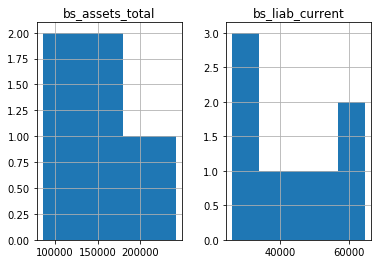

In [9]:
%matplotlib inline
compustat[['bs_assets_total', 'bs_liab_current']].hist(bins=5)

## Save

In [10]:
compustat.to_stata('./20180923_demo.dta')

# Beyond the demo

This is only a small introduction to the kinds of work you are already doing in Jupyter Notebooks. However, this same interface allows access to many more types of data and underlying computing platforms.

For example, you could easily work with Twitter or NYTimes data (using their APIs). You could also work with SQL databases containing large document stores.

In addition to running this on your own computer, the major cloud platforms can host Notebooks for you, and you can also work with computing clusters (with some additional packages to handle the parallel parts of using the data and conducting analyses).